In [199]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt
from Bio import SeqIO
from itertools import product

## base content

In [202]:
from Bio import SeqIO
dinucleotides = ['AT', 'AC', 'AG', 'AA', 'TA', 'TG', 'TC', 'TT', 'GA', 'GC', 'GT', 'GG', 'CA', 'CT', 'CG', 'CC']
results = []
for record in SeqIO.parse("./gc/merged_exons.fasta", "fasta"):
    seq = str(record.seq).upper()  
    total_pairs = len(seq) - 1 
    counts = {dn: 0 for dn in dinucleotides}
    
    for i in range(total_pairs):
        pair = seq[i:i+2]
        if pair in counts:
            counts[pair] += 1    
    content = {dn: (counts[dn] / total_pairs * 100) for dn in dinucleotides}
    content['Sequence ID'] = record.id 
    results.append(content)
df = pd.DataFrame(results)
df.to_csv("./gc/dinucleotide_content.txt",sep = "\t", index=False)

In [204]:
df['Sequence ID'] = df['Sequence ID'].apply(lambda x : x.split("(")[0])
df.index = df['Sequence ID']
df = df.iloc[:,0:16]

In [207]:
bases = ['A', 'T', 'G', 'C']
trinucleotides = [''.join(p) for p in product(bases, repeat=3)]
results = []
for record in SeqIO.parse("./gc/merged_exons.fasta", "fasta"):
    seq = str(record.seq).upper() 
    total_triplets = len(seq) - 2 
    counts = {tri: 0 for tri in trinucleotides} 
    for i in range(total_triplets):
        triplet = seq[i:i+3]
        if triplet in counts:
            counts[triplet] += 1
    content = {tri: (counts[tri] / total_triplets * 100) for tri in trinucleotides}
    content['Sequence ID'] = record.id 
    results.append(content)
df_3 = pd.DataFrame(results)
df_3['Sequence ID'] = df_3['Sequence ID'].apply(lambda x : x.split("(")[0])
df_3.to_csv("./gc/trinucleotide_content.csv", index=False)

In [209]:
df_3.index = df_3['Sequence ID']
df_3 = df_3.iloc[:,0:64]

In [218]:
df_1 = pd.read_csv("./gc/base_content.txt",sep = "\t")

In [241]:
df_1['Sequence ID'] = df_1['Sequence ID'].apply(lambda x : x.split("(")[0])
df_1.columns = ['Sequence ID','A','T','G','C']
df_1.index = df_1['Sequence ID']

df_1 = df_1[['A','T','G','C']]

df_all = pd.concat([df_1,df,df_3],axis = 1)

df_all.to_csv("./gc/base_content_all.txt",sep = "\t")

# plot

## stereo_v1

In [270]:
folder_path = "./gc/pdf/stereo_v1"
txt_files = glob.glob(os.path.join(folder_path, "*txt"))
df_list = []
for file_path in txt_files:
    file_name = os.path.splitext(os.path.basename(file_path))[0]  
    df = pd.read_csv(file_path, sep="\t", index_col=0)   
    df.index = [file_name.split(".")[0]]
    df_list.append(df)   

In [271]:
df_stereo_v1 = pd.concat(df_list)

In [272]:
df_stereo_v1

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
CRR1252510_middle_gc,265627.0,333084.0,386196.0,424737.0,464032.0,480067.0,500374.0,518889.0,545976.0,555870.0,...,3284952.0,3511926.0,3856333.0,4221664.0,4596182.0,5001292.0,5505260.0,5982363.0,5907153.0,4408254.0
CRR1252510_top_gc,318733.0,362766.0,405101.0,440710.0,464633.0,484705.0,520385.0,567671.0,612179.0,644969.0,...,8984489.0,9709692.0,10553472.0,11561577.0,12658853.0,13827786.0,15019647.0,15752728.0,15022560.0,11280707.0
CRR1252509,7010635.0,8217940.0,9268495.0,10087443.0,10812969.0,11349031.0,11884015.0,12375112.0,12744401.0,13049928.0,...,64743920.0,68759945.0,73285548.0,78099566.0,83312087.0,89184836.0,94974111.0,97997750.0,93138649.0,71525211.0
CRR1252509_bottom_gc,151165.0,204016.0,243688.0,275018.0,295525.0,322532.0,331795.0,346774.0,353386.0,361094.0,...,1294647.0,1370177.0,1466402.0,1576793.0,1704522.0,1927181.0,2165876.0,2308646.0,2246579.0,1557955.0
CRR1252510_bottom_gc,84216.0,112566.0,133063.0,151353.0,162588.0,177488.0,180600.0,188375.0,192921.0,195746.0,...,857456.0,925892.0,1013391.0,1092133.0,1203585.0,1379507.0,1577245.0,1752403.0,1759493.0,1211005.0
CRR1252509_middle_gc,447829.0,556401.0,634083.0,709199.0,780869.0,820356.0,859909.0,898730.0,940229.0,965203.0,...,4903873.0,5213038.0,5624823.0,6081330.0,6494974.0,6942617.0,7475316.0,7864801.0,7440988.0,5623276.0
CRR1252510,4718268.0,5568440.0,6295390.0,6818797.0,7266124.0,7575704.0,7862789.0,8125841.0,8339784.0,8504121.0,...,46522246.0,49776288.0,53461641.0,57650911.0,62351524.0,67961616.0,74036943.0,78695392.0,76745878.0,58128436.0
CRR1252509_top_gc,474764.0,541147.0,606933.0,664719.0,704218.0,739947.0,803606.0,873688.0,938615.0,995769.0,...,12447409.0,13317198.0,14284935.0,15407408.0,16636861.0,17875249.0,18945843.0,19244655.0,17961223.0,13685658.0


In [245]:
normalized_df = df.apply(lambda row: row / row.sum(), axis=1)

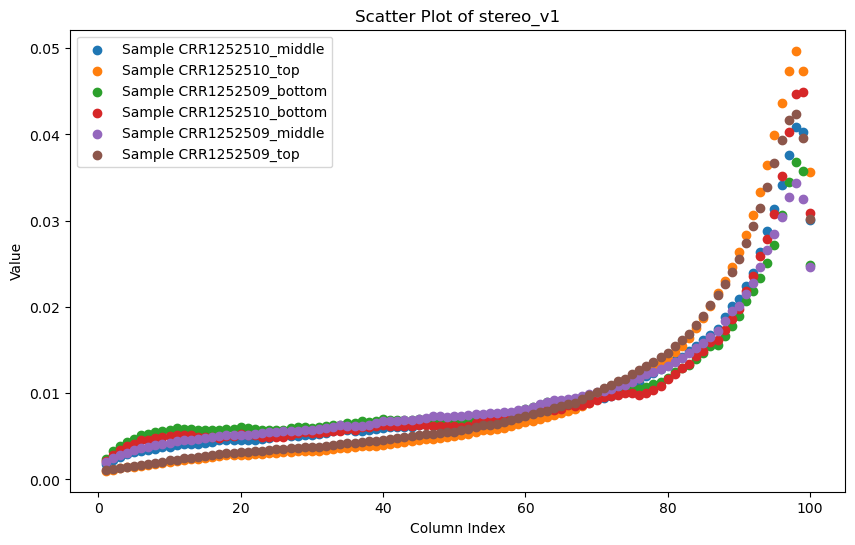

In [197]:
plt.figure(figsize=(10, 6))
for index, row in normalized_df.iterrows():
    plt.scatter(range(1, 101), row, label=f"Sample {index}")
plt.xlabel("Column Index")
plt.ylabel("Value")
plt.title("Scatter Plot of stereo_v1")
plt.legend()
plt.show()

## stereo_v2

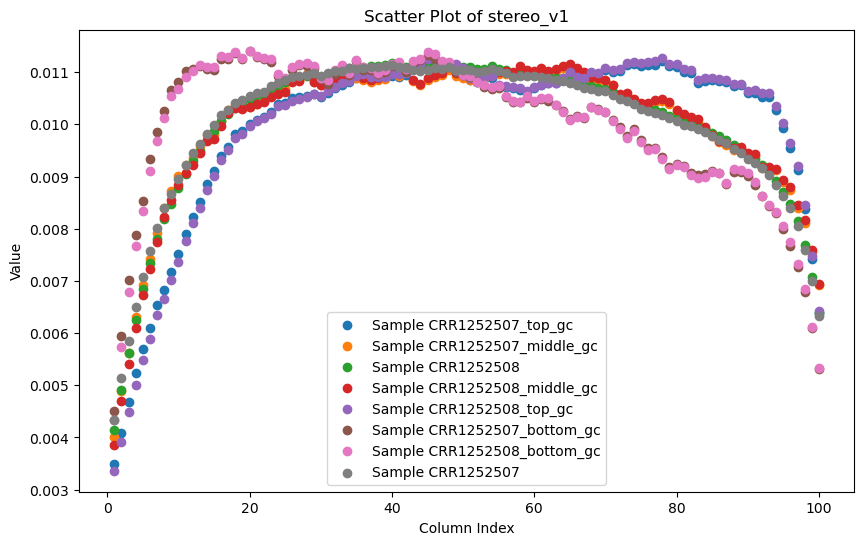

In [273]:
folder_path = "./gc/pdf/stereo_v2"
txt_files = glob.glob(os.path.join(folder_path, "*.txt"))
df_list = []
for file_path in txt_files:
    file_name = os.path.splitext(os.path.basename(file_path))[0]  
    df = pd.read_csv(file_path, sep="\t", index_col=0)   
    #df.index = [file_name.split("_")[0] + "_" + file_name.split("_")[1]]
    df.index = [file_name.split(".")[0]]
    df_list.append(df)   
df_stereo_v2 = pd.concat(df_list)
normalized_df = df_stereo_v2.apply(lambda row: row / row.sum(), axis=1)
plt.figure(figsize=(10, 6))
for index, row in normalized_df.iterrows():
    plt.scatter(range(1, 101), row, label=f"Sample {index}")
plt.xlabel("Column Index")
plt.ylabel("Value")
plt.title("Scatter Plot of stereo_v1")
plt.legend()
plt.show()

## visium 

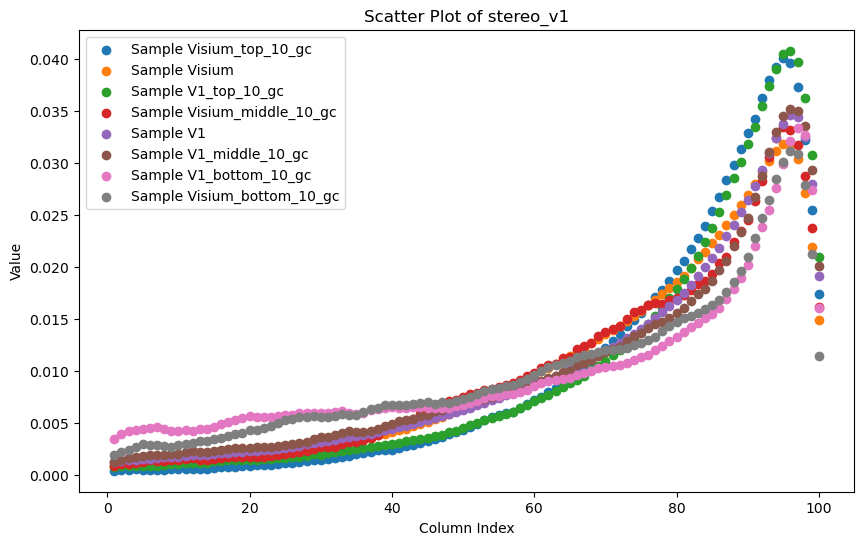

In [278]:
folder_path = "./gc/pdf/visium"
txt_files = glob.glob(os.path.join(folder_path, "*.txt"))
df_list = []
for file_path in txt_files:
    file_name = os.path.splitext(os.path.basename(file_path))[0]  
    df = pd.read_csv(file_path, sep="\t", index_col=0)   
    df.index = [file_name.split(".")[0]]
    df_list.append(df)   
df_visium = pd.concat(df_list)
normalized_df = df_visium.apply(lambda row: row / row.sum(), axis=1)
plt.figure(figsize=(10, 6))
for index, row in normalized_df.iterrows():
    plt.scatter(range(1, 101), row, label=f"Sample {index}")
plt.xlabel("Column Index")
plt.ylabel("Value")
plt.title("Scatter Plot of stereo_v1")
plt.legend()
plt.show()

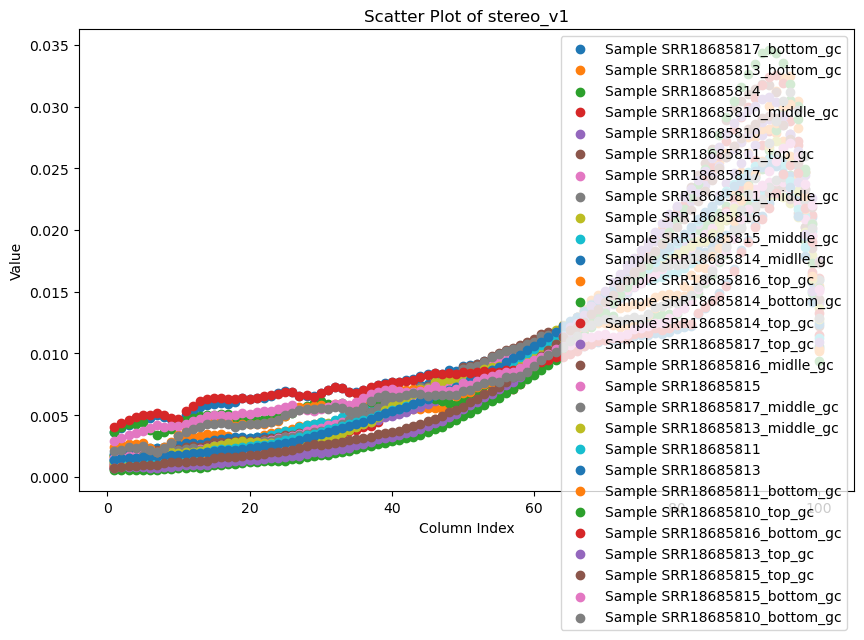

In [275]:
folder_path = "./gc/pdf/SRST/"
txt_files = glob.glob(os.path.join(folder_path, "*.txt"))
df_list = []
for file_path in txt_files:
    file_name = os.path.splitext(os.path.basename(file_path))[0]  
    df = pd.read_csv(file_path, sep="\t", index_col=0)   
    #df.index = [file_name.split("_")[0] + "_" + file_name.split("_")[1]]
    df.index = [file_name.split(".")[0]]
    df_list.append(df)   
df_SRST = pd.concat(df_list)
normalized_df = df_SRST.apply(lambda row: row / row.sum(), axis=1)
plt.figure(figsize=(10, 6))
for index, row in normalized_df.iterrows():
    plt.scatter(range(1, 101), row, label=f"Sample {index}")
plt.xlabel("Column Index")
plt.ylabel("Value")
plt.title("Scatter Plot of stereo_v1")
plt.legend()
plt.show()

In [279]:
merge_df = pd.concat([df_stereo_v1,df_stereo_v2,df_visium,df_SRST],axis = 0)

In [282]:
merge_df = merge_df.sort_index()

In [283]:
merge_df = merge_df.apply(lambda row: row / row.sum(), axis=1)

In [284]:
merge_df.to_csv('./gc/genebody_coverge.txt',sep = "\t")

In [285]:
merge_df

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
CRR1252507,0.004326,0.005133,0.005857,0.006490,0.007075,0.007563,0.008006,0.008389,0.008662,0.008944,...,0.009262,0.009164,0.009029,0.008837,0.008632,0.008393,0.008060,0.007600,0.007003,0.006331
CRR1252507_bottom_gc,0.004503,0.005943,0.007026,0.007884,0.008528,0.009335,0.009847,0.010262,0.010666,0.010815,...,0.008844,0.008629,0.008443,0.008308,0.008004,0.007677,0.007267,0.006791,0.006096,0.005317
CRR1252507_middle_gc,0.004000,0.004892,0.005622,0.006315,0.006928,0.007420,0.007926,0.008392,0.008714,0.009004,...,0.009386,0.009160,0.009159,0.009118,0.008888,0.008739,0.008390,0.008113,0.007549,0.006914
CRR1252507_top_gc,0.003495,0.004093,0.004680,0.005229,0.005685,0.006090,0.006532,0.006827,0.007169,0.007510,...,0.010594,0.010528,0.010530,0.010278,0.009935,0.009555,0.009118,0.008379,0.007422,0.006384
CRR1252508,0.004147,0.004917,0.005623,0.006258,0.006843,0.007337,0.007797,0.008193,0.008477,0.008773,...,0.009329,0.009230,0.009095,0.008906,0.008712,0.008477,0.008143,0.007679,0.007066,0.006375
CRR1252508_bottom_gc,0.004330,0.005737,0.006796,0.007675,0.008333,0.009112,0.009677,0.010130,0.010548,0.010670,...,0.008888,0.008626,0.008453,0.008318,0.008057,0.007744,0.007329,0.006843,0.006119,0.005327
CRR1252508_middle_gc,0.003864,0.004693,0.005401,0.006098,0.006728,0.007229,0.007747,0.008223,0.008553,0.008838,...,0.009436,0.009187,0.009187,0.009150,0.008939,0.008793,0.008454,0.008160,0.007589,0.006941
CRR1252508_top_gc,0.003361,0.003907,0.004481,0.005008,0.005479,0.005889,0.006341,0.006654,0.007008,0.007362,...,0.010655,0.010592,0.010603,0.010345,0.010017,0.009638,0.009210,0.008462,0.007478,0.006419
CRR1252509,0.002309,0.002707,0.003053,0.003322,0.003561,0.003738,0.003914,0.004076,0.004197,0.004298,...,0.021323,0.022646,0.024136,0.025722,0.027439,0.029373,0.031280,0.032275,0.030675,0.023557
CRR1252509_bottom_gc,0.002409,0.003252,0.003884,0.004383,0.004710,0.005140,0.005288,0.005527,0.005632,0.005755,...,0.020634,0.021838,0.023371,0.025130,0.027166,0.030715,0.034519,0.036795,0.035805,0.024830


In [191]:
data = pd.read_csv('/data_hub1/zhufan/02.v2/gc/genebody_coverge.txt', sep='\t', index_col=0 )

data = (data.T / data.sum(axis=1)).T
data

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
CRR1252507,0.004326,0.005133,0.005857,0.006490,0.007075,0.007563,0.008006,0.008389,0.008662,0.008944,...,0.009262,0.009164,0.009029,0.008837,0.008632,0.008393,0.008060,0.007600,0.007003,0.006331
CRR1252507_bottom_gc,0.004503,0.005943,0.007026,0.007884,0.008528,0.009335,0.009847,0.010262,0.010666,0.010815,...,0.008844,0.008629,0.008443,0.008308,0.008004,0.007677,0.007267,0.006791,0.006096,0.005317
CRR1252507_middle_gc,0.004000,0.004892,0.005622,0.006315,0.006928,0.007420,0.007926,0.008392,0.008714,0.009004,...,0.009386,0.009160,0.009159,0.009118,0.008888,0.008739,0.008390,0.008113,0.007549,0.006914
CRR1252507_top_gc,0.003495,0.004093,0.004680,0.005229,0.005685,0.006090,0.006532,0.006827,0.007169,0.007510,...,0.010594,0.010528,0.010530,0.010278,0.009935,0.009555,0.009118,0.008379,0.007422,0.006384
CRR1252508,0.004147,0.004917,0.005623,0.006258,0.006843,0.007337,0.007797,0.008193,0.008477,0.008773,...,0.009329,0.009230,0.009095,0.008906,0.008712,0.008477,0.008143,0.007679,0.007066,0.006375
CRR1252508_bottom_gc,0.004330,0.005737,0.006796,0.007675,0.008333,0.009112,0.009677,0.010130,0.010548,0.010670,...,0.008888,0.008626,0.008453,0.008318,0.008057,0.007744,0.007329,0.006843,0.006119,0.005327
CRR1252508_middle_gc,0.003864,0.004693,0.005401,0.006098,0.006728,0.007229,0.007747,0.008223,0.008553,0.008838,...,0.009436,0.009187,0.009187,0.009150,0.008939,0.008793,0.008454,0.008160,0.007589,0.006941
CRR1252508_top_gc,0.003361,0.003907,0.004481,0.005008,0.005479,0.005889,0.006341,0.006654,0.007008,0.007362,...,0.010655,0.010592,0.010603,0.010345,0.010017,0.009638,0.009210,0.008462,0.007478,0.006419
CRR1252509,0.002309,0.002707,0.003053,0.003322,0.003561,0.003738,0.003914,0.004076,0.004197,0.004298,...,0.021323,0.022646,0.024136,0.025722,0.027439,0.029373,0.031280,0.032275,0.030675,0.023557
CRR1252509_bottom_gc,0.002409,0.003252,0.003884,0.004383,0.004710,0.005140,0.005288,0.005527,0.005632,0.005755,...,0.020634,0.021838,0.023371,0.025130,0.027166,0.030715,0.034519,0.036795,0.035805,0.024830


In [193]:
samples = ['CRR1252510', 'CRR1252509', 'CRR1252507', 'CRR1252508', 'Visium', 'V1', 
          'SRR18685817', 'SRR18685813', 'SRR18685810', 'SRR18685811','SRR18685815', 
          'SRR18685814', 'SRR18685816']
cov_all = data.loc[data.index.isin(samples), :].copy()
data = data.loc[~data.index.isin(samples), :].copy()


In [194]:
df1 = pd.DataFrame( index=data.index, columns=['data'])
df2 = pd.DataFrame( index=data.index, columns=['site'])
df1['data'] = [data.loc[x] for x in data.index]
df2['site'] = [range(100) for x in data.index]
# df2 = pd.DataFrame([list(range(100))  for x in data.index], index=data.index, columns=['site'])
data = pd.concat([df1['data'].explode(), df2['site'].explode()], axis=1)
data['sample'] = [x.split('_')[0] for x in data.index]
data['group'] = [x.split('_')[1] for x in data.index]
data.index = range(data.shape[0])
data

,data,site,sample,group
0,0.004503,0,CRR1252507,bottom
1,0.005943,1,CRR1252507,bottom
2,0.007026,2,CRR1252507,bottom
3,0.007884,3,CRR1252507,bottom
4,0.008528,4,CRR1252507,bottom
...,...,...,...,...
3895,0.039687,95,Visium,top
3896,0.0373,96,Visium,top
3897,0.032283,97,Visium,top
3898,0.025494,98,Visium,top


In [195]:
cdict = dict({'Stereo-seq V1': ['CRR1252510', 'CRR1252509'],
              'Stereo-seq V2': ['CRR1252507', 'CRR1252508'],
              'Visium_fresh': ['Visium', 'V1'],
              'STRS': ['SRR18685817', 'SRR18685813', 'SRR18685810', 'SRR18685811',
       'SRR18685815', 'SRR18685814', 'SRR18685816']})

INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:LTSH dropped
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern pruned
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:PCLT dropped
INFO:fontTools.subset:JSTF dropped
INFO:fontTools.subset:DSIG dropped
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'GSUB': 32 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'R', 'S', 'T', 'V', 'a', 'd', 'e', 'eight', 'f', 'five', 'four', 'h', 'hyphen', 'i', 'm', 'nonmarkingreturn', 'o', 'one', 'period', 'q', 'r', 's', 'six', 'space', 't', 'three', 'two', 'u', 'underscore', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 16, 17, 19, 20, 21, 22, 23, 24, 25, 27, 53, 54, 55, 57, 66, 68, 71, 72, 73, 75, 76, 80, 82, 84, 85, 86, 87, 88]
INFO:fontTools.subset:Closed glyph list over 'GSUB': 32 gly

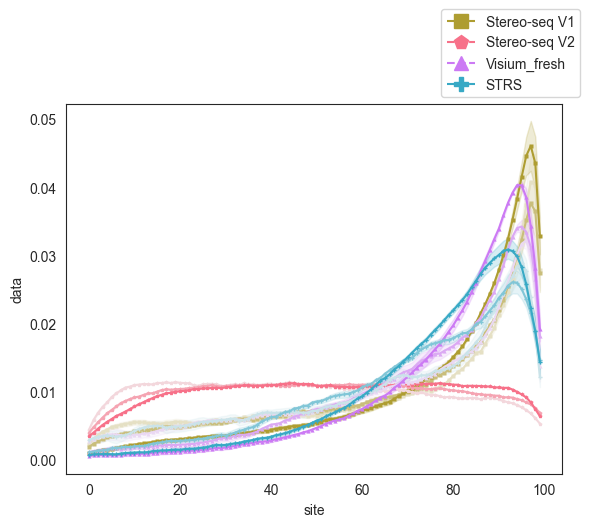

In [196]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.colors import ListedColormap
from matplotlib.lines import Line2D

base_palette=['#ae9d31', '#f77189', '#cc7af4','#38a9c5',]

markers = ['s', 'p', '^', 'P']

techs = list(cdict.keys())

legend_handles = []


for i, (tech, base_color) in enumerate(zip(techs, base_palette)):
    subset_df = data.loc[data['sample'].isin(cdict[tech])]
    
    
    gradient_palette = sns.light_palette(base_color, as_cmap=True)
    gradient_cmap = ListedColormap(gradient_palette(np.linspace(0.2, 1, 3)))
    marker = markers[i]
    sns.lineplot(data=subset_df, x='site', y='data', hue='group', hue_order=['bottom', 'middle', 'top'], mec='none',
                 dashes=False, palette=list(gradient_cmap.colors), marker=marker, markersize=3)

    legend_handles.append(Line2D([0], [0], color=base_color, marker=marker, linestyle='--', markersize=10, label=tech))
    # plt.show()


plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(handles=legend_handles, bbox_to_anchor=(1.05, 1), loc='lower right')
plt.savefig(f'gene_cov.pdf', bbox_inches='tight')
plt.show()

INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:LTSH dropped
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern pruned
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:PCLT dropped
INFO:fontTools.subset:JSTF dropped
INFO:fontTools.subset:DSIG dropped
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'GSUB': 19 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'C', 'N', 'R', 'e', 'eight', 'five', 'four', 'n', 'nonmarkingreturn', 'o', 'one', 'period', 'six', 'space', 'three', 'two', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 17, 19, 20, 21, 22, 23, 24, 25, 27, 38, 49, 53, 72, 81, 82]
INFO:fontTools.subset:Closed glyph list over 'GSUB': 19 glyphs after
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'C', 'N', 'R', 'e', 'eight', 'five', 'four', 'n', 'nonmarkingretu

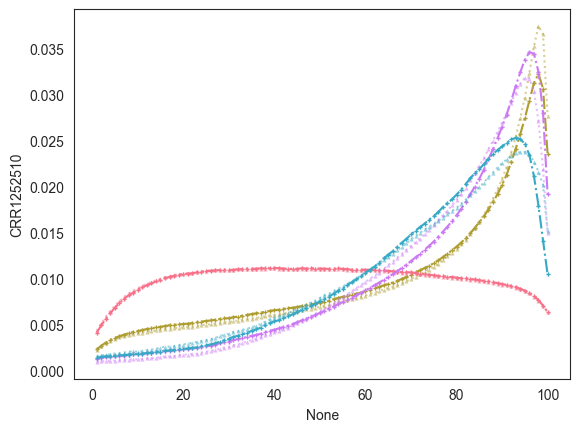

In [234]:
samples = ['CRR1252510', 'CRR1252509', 'CRR1252507', 'CRR1252508', 'Visium', 'V1', 'SRR18685817', 'SRR18685813']
alphas = [0.5, 1] * 4
markers = ['^', 'P'] * 4
line_styles = [':', '-.'] *4
base_palette=['#ae9d31', '#ae9d31', '#f77189', '#f77189', '#cc7af4', '#cc7af4', '#38a9c5','#38a9c5']
cov_all = cov_all.loc[samples, :]
cov_all.columns = [int(x) for x in cov_all.columns]
for i, sample in enumerate(samples):
    sns.lineplot(x=cov_all.columns, y=cov_all.loc[sample, :], c=base_palette[i], linestyle=line_styles[i], 
                 mec='none', alpha=alphas[i], marker=markers[i], markersize=3)
plt.savefig('gene_cov_all.pdf')